In [1]:
import pandas as pd
k_df=pd.read_json("cleaned_data.json")

In [2]:
k_df['unique_id']=1

In [33]:
new_df=k_df
new_df.shape

(42361, 5)

In [34]:
uids = new_df['unique_id'].unique()[:10] # Select 10 ids to make the example faster
new_df = new_df.query('unique_id in @uids')

In [35]:
new_df

,reportingGroup,locationName,value,unit,unique_id
2020-01-01 00:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh,1
2020-01-01 01:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh,1
2020-01-01 02:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh,1
2020-01-01 03:00:00,Electricity,1000 Hakaniemen kauppahalli,0.07,kWh,1
2020-01-01 04:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh,1
...,...,...,...,...,...
2024-10-30 20:00:00,Electricity,1000 Hakaniemen kauppahalli,0.03,kWh,1
2024-10-30 21:00:00,Electricity,1000 Hakaniemen kauppahalli,0.03,kWh,1
2024-10-30 22:00:00,Electricity,1000 Hakaniemen kauppahalli,0.02,kWh,1
2024-10-30 23:00:00,Electricity,1000 Hakaniemen kauppahalli,0.04,kWh,1


In [37]:
Y_df = pd.DataFrame({
    'ds': new_df.index,  # Timestamps as 'ds'
    'y': new_df['value'],  # The actual data as 'y'
    'unique_id':new_df['unique_id']  # The unique identifier

})

In [38]:
Y_df.shape

(42361, 3)

In [39]:
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM, NHITS, RNN


In [ ]:
horizon = 7*34

# Try different hyperparmeters to improve accuracy.
models = [LSTM(h=horizon,                    # Forecast horizon
               max_steps=500,                # Number of steps to train
               scaler_type='standard',       # Type of scaler to normalize data
               encoder_hidden_size=64,       # Defines the size of the hidden state of the LSTM
               decoder_hidden_size=64,),     # Defines the number of hidden units of each layer of the MLP decoder
          NHITS(h=horizon,                   # Forecast horizon
                input_size=2 * horizon,      # Length of input sequence
                max_steps=100,               # Number of steps to train
                n_freq_downsample=[2, 1, 1]) # Downsampling factors for each stack output
          ]
nf = NeuralForecast(models=models, freq='H')
nf.fit(df=Y_df)


Seed set to 1
Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MAE           | 0      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | LSTM          | 50.4 K | train
4 | context_adapter | Linear        | 154 K  | train
5 | mlp_decoder     | MLP           | 769    | train
----------------------------------------------------------
205 K     Trainable params
0         Non-trainable params
205 K     Total params
0.824     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Epoch 5:   0%|                           | 0/1 [00:00<?, ?it/s, v_num=6, train_loss_step=0.797, train_loss_epoch=0.797]

In [9]:
Y_hat_df = nf.predict()


C:\Users\35841\Desktop\energy_consumption_modeling\energyEV\Lib\site-packages\utilsforecast\processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
C:\Users\35841\Desktop\energy_consumption_modeling\energyEV\Lib\site-packages\utilsforecast\processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 89.57it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs




redicting DataLoader 0: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 142.98it/s]

C:\Users\35841\Desktop\energy_consumption_modeling\energyEV\Lib\site-packages\neuralforecast\core.py:214: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [14]:
Y_hat_df = Y_hat_df.reset_index()
Y_hat_df.head()


,index,unique_id,ds,LSTM,NHITS
0,0,1,2024-10-31 01:00:00,0.034851,0.024505
1,1,1,2024-10-31 02:00:00,0.026153,0.057090
2,2,1,2024-10-31 03:00:00,0.019798,0.033463
3,3,1,2024-10-31 04:00:00,0.039517,0.033239
4,4,1,2024-10-31 05:00:00,1.772569,1.508283


In [15]:
import pandas as pd
import matplotlib.pyplot as plt


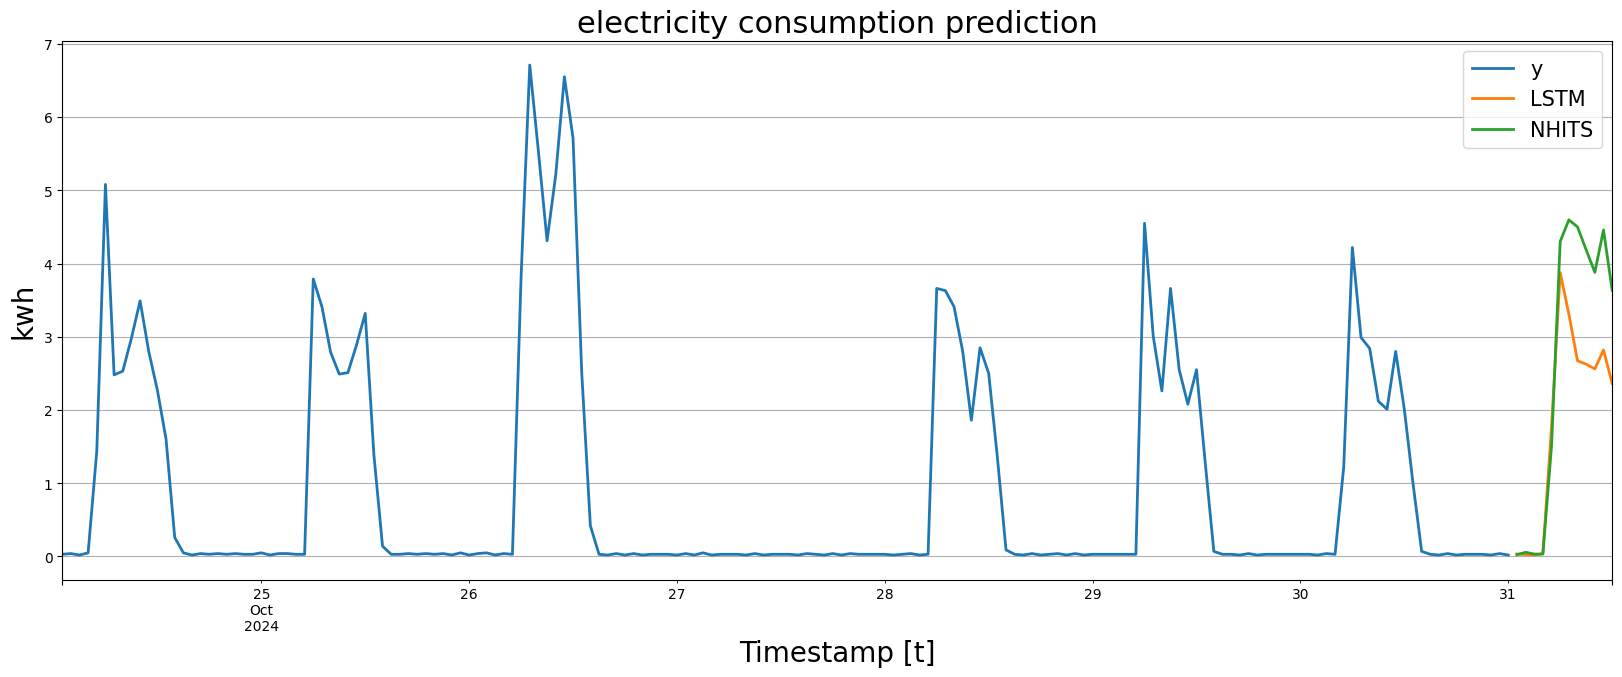

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([Y_df, Y_hat_df]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM', 'NHITS']].plot(ax=ax, linewidth=2)

ax.set_title('electricity consumption prediction', fontsize=22)
ax.set_ylabel('kwh', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()
